In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to lod the dataset
df=pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [3]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [4]:
df.isnull().sum()/df.shape[0]*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

<Axes: >

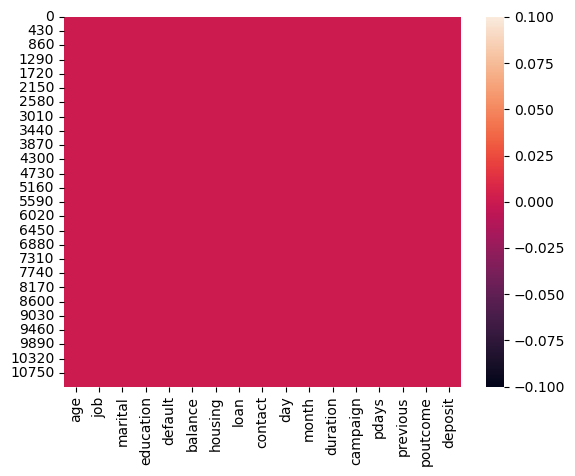

In [5]:
sb.heatmap(df.isnull())

In [6]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

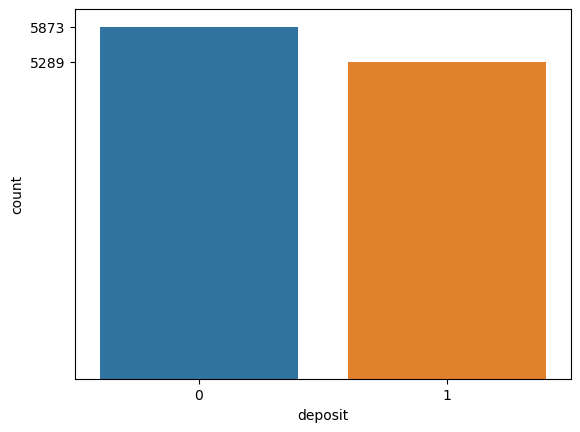

In [7]:
# #make countplot for deposit
sb.countplot(data=df,x='deposit')
f=df['deposit'].value_counts()
plt.yticks(f)
plt.show()



In [8]:
#select  input and output
X=df.drop('deposit',axis=1) #input
Y=df['deposit'] #output

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
X_train.shape

(7813, 16)

In [11]:
X_test.shape

(3349, 16)

In [12]:
Y_train.shape

(7813,)

In [13]:
Y_test.shape

(3349,)

In [14]:
#we use standardScaler
X_train.shape,X_test.shape

((7813, 16), (3349, 16))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
#create an object for STandardScaler

In [17]:
ss=StandardScaler()

In [18]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [19]:
X_train

array([[ 2.76552511,  0.15596991, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.16824122, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [ 1.33637636,  1.39500692, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       ...,
       [-1.18565083, -0.77330785, -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872],
       [-0.00870481, -1.39282635,  1.27358436, ...,  3.07264515,
         4.3350541 , -0.47109973],
       [-0.42904267, -1.0830671 , -0.32335267, ..., -0.48203214,
        -0.35894691,  0.52287872]])

In [20]:
#create a user define function :passing argument and returning  value
def create_model(model):
    model.fit(X_train,Y_train) #rtrain model with 70% of data
    y_pred=model.predict(X_test) #test the model with 30% of data
    #generate rport 
    print(classification_report(Y_test,y_pred))
#confusion matrix
    print(confusion_matrix(Y_test,y_pred))
    return model


In [21]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

#creat an object for logisticRegression
lr=LogisticRegression()


In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
#calling the function with help of logisticRegression

lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1441  319]
 [ 359 1230]]


In [24]:
#decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
#create object for Decision Tree classifier


In [26]:
dtc=DecisionTreeClassifier(random_state=43)

In [27]:
# for i in range(1,101):
#     dtc=DecisionTreeClassifier(random_state=i)
#     print("random state",i)
    
#     dtc=create_model(dtc)

In [28]:
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1760
           1       0.79      0.78      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.80      0.80      0.80      3349

[[1424  336]
 [ 349 1240]]


In [29]:
#creat a dictanary   

dict={"Features":X.columns,'Information_Gain':dtc.feature_importances_}


df1=pd.DataFrame(dict)
df1

#default is quit less

,Features,Information_Gain
0,age,0.077727
1,job,0.038054
2,marital,0.018294
3,education,0.014744
4,default,0.000713
5,balance,0.084855
6,housing,0.043811
7,loan,0.006772
8,contact,0.062115
9,day,0.075494


In [30]:
# #create  a tree 
# from sklearn import tree
# feature=X.columns
# plt.figure(figsize=(20,20))
# _=tree.plot_tree(dtc,feature_names=feature,filled=True)

In [31]:
#to overcome overfit we have 2 pruning technique
#1 Max_depth
#2 min_samples_leaf

In [32]:
#     1.max_depth: inbuilt parameter of decision tree classifier class(minlen=1 and maxlen=8)

In [33]:
#max depth parameter
#create and object for DecisionTreeclassifier
# for i in range(1,9):
#     dtc1=DecisionTreeClassifier(random_state=43,max_depth=i)
#     print("Max Depth",i)
#     dtc1=create_model(dtc1)

dtc1=DecisionTreeClassifier(random_state=43,max_depth=5)
dtc1=create_model(dtc1)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

[[1316  444]
 [ 228 1361]]


In [34]:

dtc1=DecisionTreeClassifier(random_state=43,max_depth=5)
dtc1=create_model(dtc1)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

[[1316  444]
 [ 228 1361]]


In [35]:
#creat a dictanary   

dict1={"Features":X.columns,'Information_Gain':dtc1.feature_importances_}


df2=pd.DataFrame(dict1)
df2


,Features,Information_Gain
0,age,0.026846
1,job,0.000000
2,marital,0.000000
3,education,0.002853
4,default,0.000000
5,balance,0.001040
6,housing,0.066337
7,loan,0.003762
8,contact,0.119728
9,day,0.003512


In [36]:
# #create a tree
# #create  a tree 
# from sklearn import tree
# features=X.columns
# plt.figure(figsize=(20,20))
# _=tree.plot_tree(dtc1,feature_names=features,filled=True)

In [37]:
#using 2 techniques to remove overfitting 
dtc2=DecisionTreeClassifier(random_state=43,min_samples_leaf=45)
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1379  381]
 [ 204 1385]]


In [38]:
#entropy min samples
dtc3=DecisionTreeClassifier(random_state=43,min_samples_leaf=45,criterion='entropy')
dtc3=create_model(dtc3)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.80      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1438  322]
 [ 283 1306]]


In [39]:
# entropy max depth
dtc4=DecisionTreeClassifier(random_state=43,max_depth=5,criterion='entropy')
dtc4=create_model(dtc4)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1760
           1       0.75      0.79      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1342  418]
 [ 327 1262]]


In [40]:
#ensemble techinque
#ensemble technique:- train the dataset with mutliple algorithms and taking the combined score of all algorithms
#bagging:- no of possibilities it will work on every possibility ,once the data is used it will use it again
##pasting it does not work on every possibililties ,once the data is used it is not used again

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
#ensemble  means to train the given dataset on multiple alogrithms


In [43]:
#create an object
rfc=RandomForestClassifier()


In [44]:
# #bagging feature 1 to 16
# for i in range(1,17):
#     rfc=RandomForestClassifier(max_features=i,random_state=1)
#     print('Max features',i)
#     #call function
#     rfc=create_model(rfc)
    


In [45]:
rfc=RandomForestClassifier(max_features=4,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1434  326]
 [ 193 1396]]


In [46]:
dict5={'Features':X.columns,"Information_Gain":rfc.feature_importances_}
df4=pd.DataFrame(dict5)
df4
#sorting values
df4=df4.sort_values(by='Information_Gain',ascending=False)
df4

,Features,Information_Gain
11,duration,0.362295
5,balance,0.089021
0,age,0.088193
10,month,0.083337
9,day,0.071265
13,pdays,0.049338
1,job,0.039578
8,contact,0.038811
15,poutcome,0.035680
12,campaign,0.033898


In [47]:
from sklearn.ensemble  import AdaBoostClassifier
#create an object for AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=1,n_estimators=)

In [48]:
# ada=AdaBoostClassifier(random_state=1,n_estimators=)

In [49]:
# #hit and try method  for adaboost classifier
# for i in range(1,17):
#     ada=AdaBoostClassifier(random_state=1,n_estimators=i)
#     print("No of estimators:",i)
#     #call function
#     ada=create_model(ada)

In [50]:
ada=AdaBoostClassifier(random_state=1,n_estimators=3)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349

[[1262  498]
 [ 310 1279]]


In [51]:
from sklearn.ensemble  import GradientBoostingClassifier

In [52]:
# for i in range(1,17):
#     gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
#     print("No of estimators:",i)
#     gbc=create_model(gbc)

In [53]:
gbc=GradientBoostingClassifier(random_state=1,n_estimators=14)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1760
           1       0.76      0.83      0.79      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1343  417]
 [ 266 1323]]


In [54]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBClassifier

In [56]:
np.arange

<function numpy.arange>

In [57]:
xgb=XGBClassifier()

In [58]:
for i in range(1,101):
    xgb=XGBClassifier(random_state=1,n_estimators=i)
    print("number",i)
    xgb=create_model(xgb)

number 1
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1760
           1       0.77      0.83      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

[[1368  392]
 [ 266 1323]]
number 2
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1760
           1       0.79      0.85      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1395  365]
 [ 241 1348]]
number 3
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1760
           1       0.79      0.84      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82    

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1760
           1       0.82      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1458  302]
 [ 205 1384]]
number 25
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1760
           1       0.82      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1457  303]
 [ 201 1388]]
number 26
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1760
           1       0.82      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349


              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1760
           1       0.83      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1465  295]
 [ 197 1392]]
number 48
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.86      0.85      0.85      3349

[[1464  296]
 [ 195 1394]]
number 49
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.86      0.86      0.85      3349


              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1760
           1       0.82      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1460  300]
 [ 207 1382]]
number 72
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1760
           1       0.82      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1462  298]
 [ 202 1387]]
number 73
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1760
           1       0.82      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1760
           1       0.83      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1473  287]
 [ 210 1379]]
number 95
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1760
           1       0.83      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1472  288]
 [ 210 1379]]
number 96
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1760
           1       0.83      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349


In [59]:
xgb=XGBClassifier(random_state=1,n_estimators=49)
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.86      0.86      0.85      3349
weighted avg       0.86      0.85      0.85      3349

[[1462  298]
 [ 189 1400]]


In [60]:
for i in range(1,10):
    xgb1=XGBClassifier(random_state=1,n_estimators=i,gamma=15)
    print("number",i)
    xgb1=create_model(xgb1)

number 1
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1760
           1       0.77      0.84      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1356  404]
 [ 248 1341]]
number 2
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.83      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1416  344]
 [ 269 1320]]
number 3
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1760
           1       0.78      0.86      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82    

In [61]:
for i in range(1,10):
    xgb2=XGBClassifier(random_state=1,n_estimators=i,eta=0.09)
    print("number",i)
    xgb2=create_model(xgb2)

number 1
              precision    recall  f1-score   support

           0       0.72      0.91      0.80      1760
           1       0.86      0.61      0.71      1589

    accuracy                           0.77      3349
   macro avg       0.79      0.76      0.76      3349
weighted avg       0.79      0.77      0.76      3349

[[1601  159]
 [ 618  971]]
number 2
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1760
           1       0.83      0.74      0.78      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.80      0.80      3349
weighted avg       0.81      0.81      0.80      3349

[[1518  242]
 [ 408 1181]]
number 3
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1760
           1       0.80      0.80      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81    

In [62]:
for i in range(1,10):
    xgb3=XGBClassifier(random_state=1,n_estimators=i,eta=0.10,gamma=10)  #eta learning rate
    print("number",i)
    xgb3=create_model(xgb3)

number 1
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1760
           1       0.83      0.70      0.76      1589

    accuracy                           0.79      3349
   macro avg       0.80      0.79      0.79      3349
weighted avg       0.80      0.79      0.79      3349

[[1541  219]
 [ 481 1108]]
number 2
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1760
           1       0.81      0.80      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1454  306]
 [ 323 1266]]
number 3
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1760
           1       0.80      0.83      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82    

In [63]:
for i in range(1,10):
    xgb4=XGBClassifier(random_state=1,n_estimators=i,eta=0.10,gamma=i)  #eta learning rate
    print("number",i)
    xgb4=create_model(xgb4)

number 1
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1760
           1       0.86      0.63      0.73      1589

    accuracy                           0.77      3349
   macro avg       0.79      0.77      0.77      3349
weighted avg       0.79      0.77      0.77      3349

[[1590  170]
 [ 584 1005]]
number 2
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1760
           1       0.81      0.78      0.79      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1469  291]
 [ 352 1237]]
number 3
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1760
           1       0.80      0.81      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81    

#what is hyperplane 
# it is decision boundary that seperates both classes
# if graph is a 2D, then hyperplane will be 1D
# if graph is a 3D them hyperplane will be 2D


# support vector are those datapoint that are closes to hyperplane  distance formula

# more distance hyperplane best

# margins
# In support vector machine the goal is to find the best hyperplane that seperates the classes given in the dataset

# The hyperplane is the decision boundary that maximize the margin
#There are 2type of Margins in SVM:
#hard margin
#soft margin


In [64]:
# # The hyperplane is the decision boundary that maximize the margin
# #There are 2type of Margins in SVM:
# # Hard Margin : in hard margin svm we assume that linearly seperable. The objective is find best hyperplane that maximize the margin correctly
# .This approach is called had margin because it enforces a strict seperation between clsases and doest not allow mis calculation (overfitting)

# #soft margin : Int soft margin the svm allows some mis calculation to occur.The objective is to find the hyperplane
# that maxmizes the margin while also allowing some misclassification to happen

In [65]:
from sklearn.svm import SVC

In [68]:
svm = SVC()

In [69]:
for i in range(1,10):
    svm = SVC()
    print("number",i)
    svm=create_model(svm)

number 1
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1407  353]
 [ 262 1327]]
number 2
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1407  353]
 [ 262 1327]]
number 3
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82    

In [79]:
svm = SVC(kernel='poly',degree=3)
svm=create_model(svm)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1760
           1       0.79      0.80      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

[[1417  343]
 [ 311 1278]]
